In [1]:
!git clone https://github.com/JakobUniver/Traffic-sign-detection-in-color-videos.git -q

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git -q

In [ ]:
!pip install -r yolov7/requirements.txt -q

     |████████████████████████████████| 1.6 MB 35.2 MB/s 


In [ ]:
#!git clone https://github.com/ultralytics/yolov3 -q

In [ ]:
#!pip install -r yolov3/requirements.txt -q

In [2]:
#!rm -rf Traffic-sign-detection-in-color-videos

In [3]:
import numpy as np
import pandas as pd
import cv2
import torch
from google.colab.patches import cv2_imshow

In [ ]:
#Get pretrained weigths
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt -q

In [ ]:
#Train YOLOv7 on custom dataset
!python yolov7/train.py --weights yolov7.pt --data "Traffic-sign-detection-in-color-videos/data/data_yolo/traffic_signs.yaml" --workers 4 --batch-size 16 --epochs 25 --img 640 --cfg yolov7/cfg/training/yolov7.yaml --hyp yolov7/data/hyp.scratch.p5.yaml

YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='yolov7/cfg/training/yolov7.yaml', data='Traffic-sign-detection-in-color-videos/data/data_yolo/traffic_signs.yaml', device='', entity=None, epochs=25, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='yolov7/data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp6', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=4, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, we

In [ ]:
#Train YOLOv3 model
#!python yolov3/train.py --img 640 --batch 16 --epochs 20 --data "Traffic-sign-detection-in-color-videos/data/data_yolo/traffic_signs.yaml" --weights yolov3.pt

In [ ]:
#Test YOLOv7
!python yolov7/detect.py --weights runs/train/exp6/weights/best.pt --source "Traffic-sign-detection-in-color-videos/data/data_yolo/test/images"

In [ ]:
#Test YOLOv3
#!python yolov3/detect.py --weights yolov3/runs/train/exp/weights/best.pt --source "Traffic-sign-detection-in-color-videos/data/data_yolo/test/images"

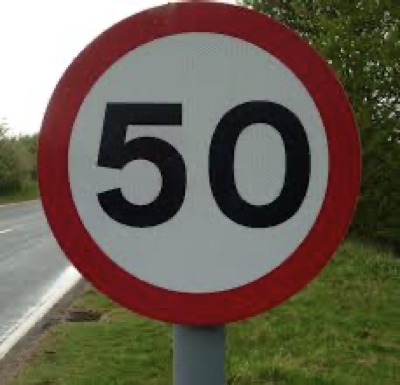

In [ ]:
img_path = "Traffic-sign-detection-in-color-videos/data/dataset1/images/road100.png"
img = cv2.imread(img_path)
cv2_imshow(img)

In [ ]:
img.shape

(400, 300, 3)

In [ ]:
#Test image from different dataset
!python yolov3/detect.py --weights yolov3/runs/train/exp2/weights/best.pt --source "Traffic-sign-detection-in-color-videos/data/dataset1/images"

In [ ]:
#.pt to .weights conversion: https://github.com/AlexeyAB/darknet/issues/2587#issuecomment-500895636

In [ ]:
#YOLOv3 weights from https://opencv-tutorial.readthedocs.io/en/latest/yolo/yolo.html
cfg_path = "Traffic-sign-detection-in-color-videos/yolov3.cfg"
weights_path = "Traffic-sign-detection-in-color-videos/yolov3.weights"

In [ ]:
net = cv2.dnn.readNetFromDarknet(cfg_path, 'yolov3.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)

In [ ]:
#Function for detecting traffic sign with YOLOv3
def detect_sign(img, net):
  blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

  ln = net.getLayerNames()
  ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

  net.setInput(blob)
  outputs = net.forward(ln)

  boxes = []
  confidences = []
  classIDs = []
  h, w = img.shape[:2]

  for output in outputs:
      for detection in output:
          scores = detection[5:]
          classID = np.argmax(scores)
          confidence = scores[classID]
          if confidence > 0.5:
              box = detection[:4] * np.array([w, h, w, h])
              (centerX, centerY, width, height) = box.astype("int")
              x = int(centerX - (width / 2))
              y = int(centerY - (height / 2))
              box = [x, y, int(width), int(height)]
              boxes.append(box)
              confidences.append(float(confidence))
              classIDs.append(classID)

  indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
  if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = (0, 0, 0)
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

  return img

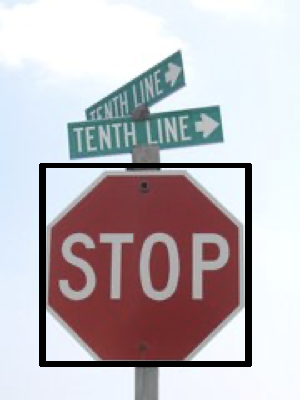

In [ ]:
cv2_imshow(detect_sign(img, net))

In [ ]:
model = torch.hub.load('yolov7', 'custom', 'runs/train/exp6/weights/best.pt', source='local') 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Adding autoShape... 


In [ ]:
model = torch.hub.load('yolov7', 'custom', 'Traffic-sign-detection-in-color-videos/model.pt', source='local') 

Adding autoShape... 


In [ ]:
result = model('Traffic-sign-detection-in-color-videos/data/dataset1/images/road221.png')

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
first = result.pandas().xyxy[0].loc[0]
result.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,130.524979,184.212509,155.186646,208.227905,0.796247,0,ts1


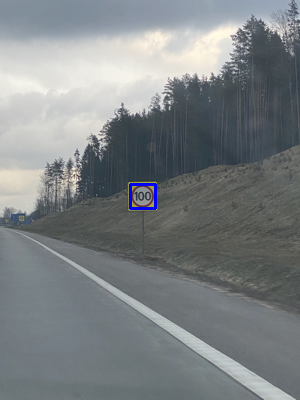

In [ ]:
img = cv2.imread('Traffic-sign-detection-in-color-videos/data/dataset1/images/road221.png')
cv2.rectangle(img, (int(first.xmin), int(first.ymin)), (int(first.xmax), int(first.ymax)), (255,0,0), 2)
cv2_imshow(img)

In [ ]:
img = cv2.imread('Traffic-sign-detection-in-color-videos/data/dataset1/images/road221.png')
crop = img[int(first.ymin):int(np.ceil(first.ymax)), int(first.xmin):int(np.ceil(first.xmax))]
cv2_imshow(crop)

In [ ]:
#Uses YOLO model to detect traffic signs. Returns images with only traffic signs
def detect(img_path, model):
  cropped = []
  img = cv2.imread(img_path)
  detected = model(img)
  for i, d in detected.pandas().xyxy[0].iterrows():
    crop = img[int(d.ymin):int(np.ceil(d.ymax)), int(d.xmin):int(np.ceil(d.xmax))]
    cropped.append(crop)
  return cropped

In [ ]:
detection = detect('Traffic-sign-detection-in-color-videos/data/dataset1/images/road212.png', model)
for det in detection:
  cv2_imshow(det)

In [4]:
import os


# Augmenting photos for better training on different conditions
data = []
img_dir_path = "Traffic-sign-detection-in-color-videos/data/dataset1/images/"
for filename in os.listdir(img_dir_path):
  f = os.path.join(img_dir_path, filename)
  img = cv2.imread(f)
  data.append(img)


import re

annotations = []
img_dir_path = "Traffic-sign-detection-in-color-videos/data/dataset1/annotations/"
for filename in os.listdir(img_dir_path):
  f = os.path.join(img_dir_path, filename)
  with open(f) as annot:
    text = annot.read()
    xmin = re.search('<xmin>(.*)</xmin>', text)
    ymin = re.search('<ymin>(.*)</ymin>', text)
    xmax = re.search('<xmax>(.*)</xmax>', text)
    ymax = re.search('<ymax>(.*)</ymax>', text)
    name = re.search('<name>(.*)</name>', text)
    annotations.append([[int(xmin.group(1)), int(ymin.group(1))],[int(xmax.group(1)), int(ymax.group(1))], name.group(1)])

import random

In [5]:
import random

def distort(img, ann):
  width = len(img[0])
  length = len(img)
  new_width = random.randint(round(width/2), width)
  new_length = random.randint(round(length/2), length)
  light = random.uniform(0.7, 1.0)
  new_ann = ann

  #corners
  #0 3
  #1 2
  corner = random.randint(0,3)
  if corner == 0:
      new_img = [row[:new_width] for row in img[:new_length]]
      new_ann[0][0] = min(ann[0][0], new_width)
      new_ann[0][1] = min(ann[0][1], new_length)
      new_ann[1][0] = min(ann[1][0], new_width)
      new_ann[1][1] = min(ann[1][1], new_length)
  elif corner == 1:
      new_img = [row[:new_width] for row in img[length - new_length:]]
      new_ann[0][0] = min(ann[0][0], new_width)
      new_ann[0][1] = max(ann[0][1], length - new_length)
      new_ann[1][0] = min(ann[1][0], new_width)
      new_ann[1][1] = max(ann[1][1], length - new_length)
  elif corner == 2:
      new_img = [row[width - new_width:] for row in img[length - new_length:]]
      new_ann[0][0] = max(ann[0][0], width - new_width)
      new_ann[0][1] = max(ann[0][1], length - new_length)
      new_ann[1][0] = max(ann[1][0], width - new_width)
      new_ann[1][1] = max(ann[1][1], length - new_length)
  elif corner == 3:
      new_img = [row[width - new_width:] for row in img[:new_length]]
      new_ann[0][0] = max(ann[0][0], width - new_width)
      new_ann[0][1] = min(ann[0][1], new_length)
      new_ann[1][0] = max(ann[1][0], width - new_width)
      new_ann[1][1] = min(ann[1][1], new_length)

  for i in range(new_length):
    for j in range(new_width):
      for k in range(3):
        new_img[i][j][k] = round(new_img[i][j][k] * light)
  return [new_img, new_ann]

In [8]:
# Creating training data to data_yolo folder and saving the classification also to dist_annotations folder under dataset1


path = 'Traffic-sign-detection-in-color-videos/data/data_yolo/train/images/'
path2 = 'Traffic-sign-detection-in-color-videos/data/dataset1/dist_annotations/'
path3 = 'Traffic-sign-detection-in-color-videos/data/data_yolo/train/labels/'
par_dir = 'Traffic-sign-detection-in-color-videos/data/dataset1/'

if not os.path.exists(path2):
  os.mkdir(os.path.join(par_dir, "dist_annotations"))

start = 900
for i, image in enumerate(data[:10]):
  name = str(start).zfill(5)
  annotation = annotations[i]
  img_ann = distort(image, annotation)
  #print(img_ann[0])
  cv2.imwrite(os.path.join(path , name + '.jpg'), np.array(img_ann[0]))
  with open(os.path.join(path2 , name + '.xml'), "w+") as f:
    f.write('''<annotation>\n
<folder>images</folder>\n
<filename>''' + name + '.jpg' + '''</filename>\n
<size>\n
<width>''' + str(len(img_ann[0][0])) + '''</width>\n
<height>''' + str(len(img_ann[0])) + '''</height>\n
<depth>3</depth>\n
</size>\n
<segmented>0</segmented>\n
<object>\n
<name>''' + img_ann[1][2] + '''</name>\n
<pose>Unspecified</pose>\n
<truncated>0</truncated>\n
<occluded>0</occluded>\n
<difficult>0</difficult>\n
<bndbox>\n
<xmin>''' + str(img_ann[1][0][0]) + '''</xmin>\n
<ymin>''' + str(img_ann[1][0][1]) + '''</ymin>\n
<xmax>''' + str(img_ann[1][1][0]) + '''</xmax>\n
<ymax>''' + str(img_ann[1][1][1]) + '''</ymax>\n
</bndbox>\n
</object>\n
</annotation>''')
  x = len(img_ann[0][0])
  y = len(img_ann[0])
  x_center_coord = (img_ann[1][0][0] + img_ann[1][1][0])/2
  aoi_width = img_ann[1][1][0] - img_ann[1][0][0]
  y_center_coord = (img_ann[1][0][1] + img_ann[1][1][1])/2
  aoi_length = img_ann[1][1][1] - img_ann[1][0][1]
  x_center = x_center_coord / x
  y_center = y_center_coord / y
  width = aoi_width / x
  length = aoi_length / y
  with open(os.path.join(path3 , name + '.txt'), "w+") as f:
    f.write("0 " + str(x_center) + " " + str(y_center) + " " + str(width) + " " + str(length) + "\n")

  start += 1

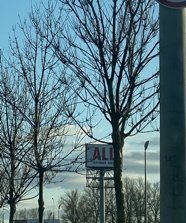

In [7]:
img_path = "Traffic-sign-detection-in-color-videos/data/dataset1/dist_images/image0.jpg"
img = cv2.imread(img_path)
cv2_imshow(img)

In [ ]:
cap = cv2.VideoCapture('traffic-sign-to-test.mp4')

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
   
size = (frame_width, frame_height)
result = cv2.VideoWriter('result.mp4', cv2.VideoWriter_fourcc(*'MP4V'),10, size)
 
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret == True:
    
    detected = model(frame)
    new_frame = frame.copy()
    for i, d in detected.pandas().xyxy[0].iterrows():
      crop = frame[int(d.ymin):int(np.ceil(d.ymax)), int(d.xmin):int(np.ceil(d.xmax))]

      cv2.rectangle(new_frame, (int(d.xmin), int(d.ymin)), (int(np.ceil(d.xmax)), int(np.ceil(d.ymax))), (255,0,0), 2)
      """
      if len(crop) > 0:
        cv2_imshow(crop)
      """

    result.write(new_frame)
    cv2.waitKey(1) & 0xff
 
  else: 
    break

cv2.destroyAllWindows()
cap.release()
result.release()